<a href="https://colab.research.google.com/github/ShubhKjoshi/Cardiovascular_Risk-prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**
***
Before going deep into the project, Lets understand what are Cardiovascular diseases and some of their major causes.

**Cardiovascular diseases**, also called CVDs, are the leading cause of death globally, **causing an estimated 17.9 million deaths each year**. 

**CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions**. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**. 

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths.

If you want to know more, Plz visit : https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1



# **Problem Statement and Objective :**

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information.
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description :**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

This dataset has the following 17 variables as explanatory variables:

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke 
(Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Importing necessary libraries**

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Importing warnings library. The warnings module handles warnings in Python. 
# Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Support vector machine Classifier.
from sklearn import svm

# Importing XGB Classifier.
import xgboost as xgb

# Importing Tensorflow for neural networks.
from tensorflow import keras
import tensorflow as tf

# Importing Sklearn metrics for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

# Importing SMOTE and Tomek for handling class imbalancies.
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Importing Counter.
from collections import Counter

# **Loading the dataset and Exploring it...**

We will load the dataset from the drive and understand it. What features do we have and how are we going to process them etc..

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path ='/content/drive/MyDrive/Projects_capstones/CARDIOVASCULAR RISK PREDICTION_CAPSTONE PROJECT/'

# Importing Cardiovascular risk Data File.
Cardio_df = pd.read_csv(Data_path + "data_cardiovascular_risk.csv")

# Observing the dataset
Cardio_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


Now lets see few records...

In [ ]:
# First 5 rows from the dataset..
Cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Last 5 rows from the dataset..
Cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# Shape of the dataset
Cardio_df.shape

(3390, 17)

We have 3390 rows and 17 columns in the dataset..

In [ ]:
# Observe columns from the dataset
Cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

This is the list of columns that we have ...we discussed them above in data description.

In [ ]:
# Description of all columns in the dataset.
Cardio_df.describe(include = 'all').T   # T will give transpose of the output..and we are including all columns...

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [ ]:
# .info gives the information about the dataset , columns their data type and  null count etc..
Cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see their are null values present in totChol,  BMI, glucose , BPMeds ,cigsPerDay,   education has some null values and  heartRate has 1 null value..

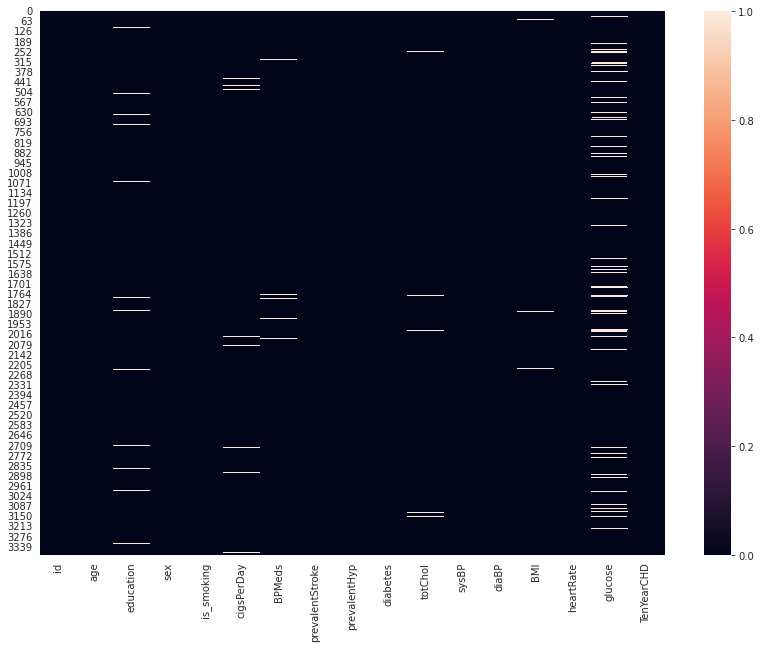

In [ ]:
# Plotting the heatmap for missing values 
missing_values = Cardio_df.isnull()  #store the null values from dataset
plt.figure(figsize=(14,10))
sns.heatmap(missing_values)

We will try to see the count and percentage of null values in the particular column with respect to the complete dataset..

In [ ]:
# It will show columns that have at least one null value.
missing_val = Cardio_df.columns[Cardio_df.isnull().any()].tolist()

# printing missing value counts for various columns.
print('Missing value Count')
print(Cardio_df[missing_val].isnull().sum().sort_values(ascending = False))  # printing missing values in descending ...
print('___'*12)
print('___'*12)

# printing missing value percentages for various columns.
print('Missing value Percentage')
print(round(Cardio_df[missing_val].isnull().sum().sort_values(ascending = False)/len(Cardio_df)*100,2))  # Dividing by totalrecords lenght and multiplying by 100 to get percentage.

Missing value Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
____________________________________
____________________________________
Missing value Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


glucose and education column have more null values. Usually we replace this null values with the help of other records. But , in this particular case the dataset is related to medical domain,that said, the entries in this dataset are person specific and the values vary among different individuals. Hence the most logical option that we have to deal with such values is removing the rows with any null value.

If we try to impute null values using advanced techniques it may affect the result as those values will be inaccurate and we can't take any risks in this prediction.

# **EDA And Feature Engineering**

Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. It’s a scientific approach to get the story of the data.

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises.

Feature engineering mainly have two goals:

   *  Preparing the proper input dataset, compatible with the machine learning   algorithm requirements.

   *  Improving the performance of machine learning models.
   
Lets start by handling the null values that we found out earlier..

In [ ]:
# dropping the missing value since we cannot fill it using imputing techniques as 
# this data is related to medical domain (hence varies from person to person).
New_df = Cardio_df.dropna(how = "any")  #Drop any record with null value ..

# Checking if there's still any null values left.
New_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now the dataset is free of all the null values..
The patient ID column is of no use for our objective so we will drop the column..

In [ ]:
#Dropping the column id and from the dataset..
New_df =New_df.drop(columns =['id'])

In [ ]:
New_df.shape   # Checking the shape of new_df after removing null values..

(2927, 16)

In [ ]:
New_df.columns  #Have a look at remaining columns..

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Target Variable -TenYearCHD**

We will try to observe our target variable ...

In [ ]:
#Checking the count of how many people have risk ...
New_df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

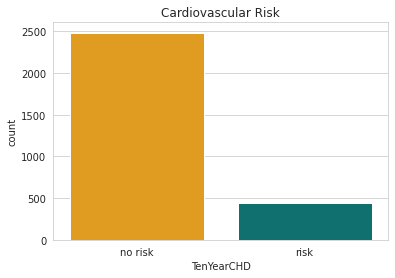

In [ ]:
# plotting number of patients at risk of CHD vs those whose results are normal.
my_palette = {0 : 'orange' , 1 : 'teal'}
X = sns.countplot(New_df['TenYearCHD'],palette =my_palette)
X.set_xticklabels(['no risk','risk'])  #settiing xtitle for labels
X.set_title('Cardiovascular Risk') # setting Title
plt.show()

It is clear the percentage/count of people with normal results are pretty high and this creates a problem of class imbalance. It could create problems for model to perform better in such case because the model will be baised towards the normal result predictions..

So we have to convert this data into a balance class, we can achieve so by using different sampling techniques(udersampling or oversampling), during train/test split.

## Gender

In [ ]:
# Counting the number of males and females.
New_df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

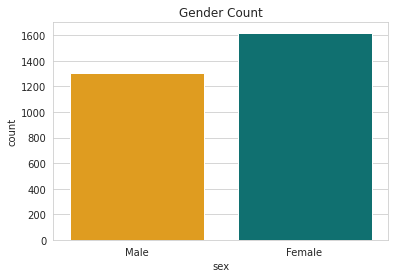

In [ ]:
# Plotting the bar graph with number of males and females.
my_palette = {'M' : 'orange' , 'F': 'teal'}
X = sns.countplot(New_df['sex'], palette = my_palette) # plotting countplot
X.set_xticklabels(['Male','Female'])# settiing xtitle for labels
X.set_title('Gender Count') #writing title
plt.show()

Number of Female records are more than Male records in the dataset.

In [ ]:
#converting sex column into binary..
New_df['sex'] = New_df['sex'].map({'M' : 1,'F' : 0}) # Mapping 0 value to Female and 1 to Male

## Daibetes

In [ ]:
New_df.diabetes.value_counts() # Value count for diabetes or not

0    2848
1      79
Name: diabetes, dtype: int64

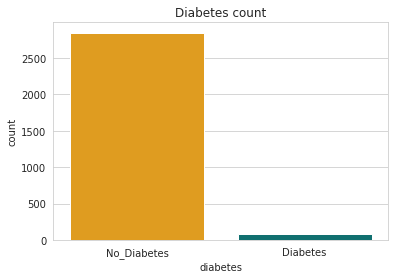

In [ ]:
# Plotting countplot for diabetic column
my_palette = {0 : 'orange' , 1 : 'teal'}
X =sns.countplot(New_df['diabetes'],palette = my_palette)
X.set_xticklabels(['No_Diabetes','Diabetes']) 
X.set_title('Diabetes count')  #setting the title
plt.show()

Only 79 people are diabetic in the data ..There is a large difference in the data ...(bias towards non diabetic )

## Is_smoking

In [ ]:
New_df.is_smoking.value_counts()  #checking value counts for is_smoking column..

NO     1480
YES    1447
Name: is_smoking, dtype: int64

Converting Is_smoking column into binary(0 and 1)

In [ ]:
# Converting "is_smoking" into binary(1 for people who smokes and 0 for those who does'nt).
New_df['is_smoking'] = New_df['is_smoking'].map({'YES':1 ,'NO': 0})   #Just like gender we converted this column into binary.

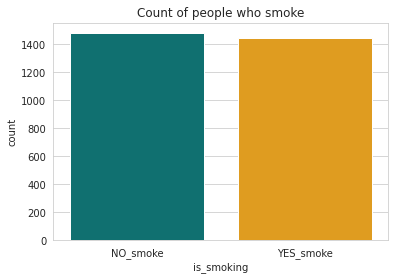

In [ ]:
my_palette = {1: 'orange' , 0 : 'teal'}
X =sns.countplot(New_df['is_smoking'],palette = my_palette)
X.set_xticklabels(['NO_smoke','YES_smoke']) 
X.set_title('Count of people who smoke')  #setting the title
plt.show()

This column has same number of categories...

We will observe the smoking pattern through different gender ...

In [ ]:
# Number of males who smokes cigarette.
Male_smokers = New_df.loc[(New_df['is_smoking']==1) & (New_df['sex']== 1)] #if is_smoking=1 and it is a Male then it will count as Male smoker
Male_smokers.shape[0] #only interested in rows (count)

809

In [ ]:
# Number of Females who smokes cigarette.
Female_smokers = New_df.loc[(New_df['is_smoking']==1) & (New_df['sex']==0)] #if is_smoking =1 and it is a Female then it will count as Female smoker
Female_smokers.shape[0] #only interested in rows (count)

638

809 Males smokers and 638 Female smokers Who at least smokes 1 Cigarette a day .

Its clear that number of males who smokes are significantly higher than the female smokers, even though the entries for female patients were more. This shows smoking is more common in males and its a major cause of CHDs for male patients.

## Disease Vs Age

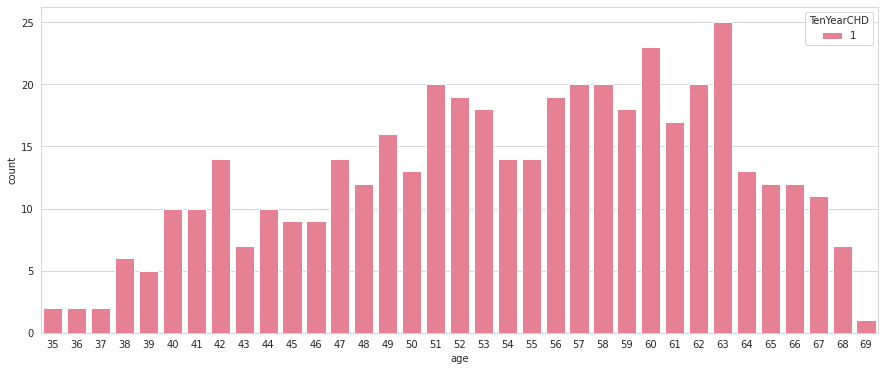

In [ ]:
positive_cases = New_df[New_df['TenYearCHD'] == 1]  # Cardioascular risk detected count vs Age.. 
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

Cardiovascular Risk is gradually increasing with age. Its more in between age 51 to 63 

In [ ]:
#seperating the numerical and categorical features..
Categorical_features = [i for i in New_df.columns if New_df[i].nunique()<=4]   #Looping through New_df columns and Checkig if unique values are less than or equal to 4
Numeric_features = [i for i in New_df.columns if i not in Categorical_features]  #Looping through New_df columns and string columns in numeric_features which are not in categorical_features.

print("Following are the categorical features in this dataset:")
print(Categorical_features)
print("Following are the numeric features in this dataset:")
print(Numeric_features)

Following are the categorical features in this dataset:
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Following are the numeric features in this dataset:
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuous values.

We also Converted remaining ['sex', 'is_smoking'] categorical features into binary so that we can pass them while training the model.

## Observing distribution and removing outliers

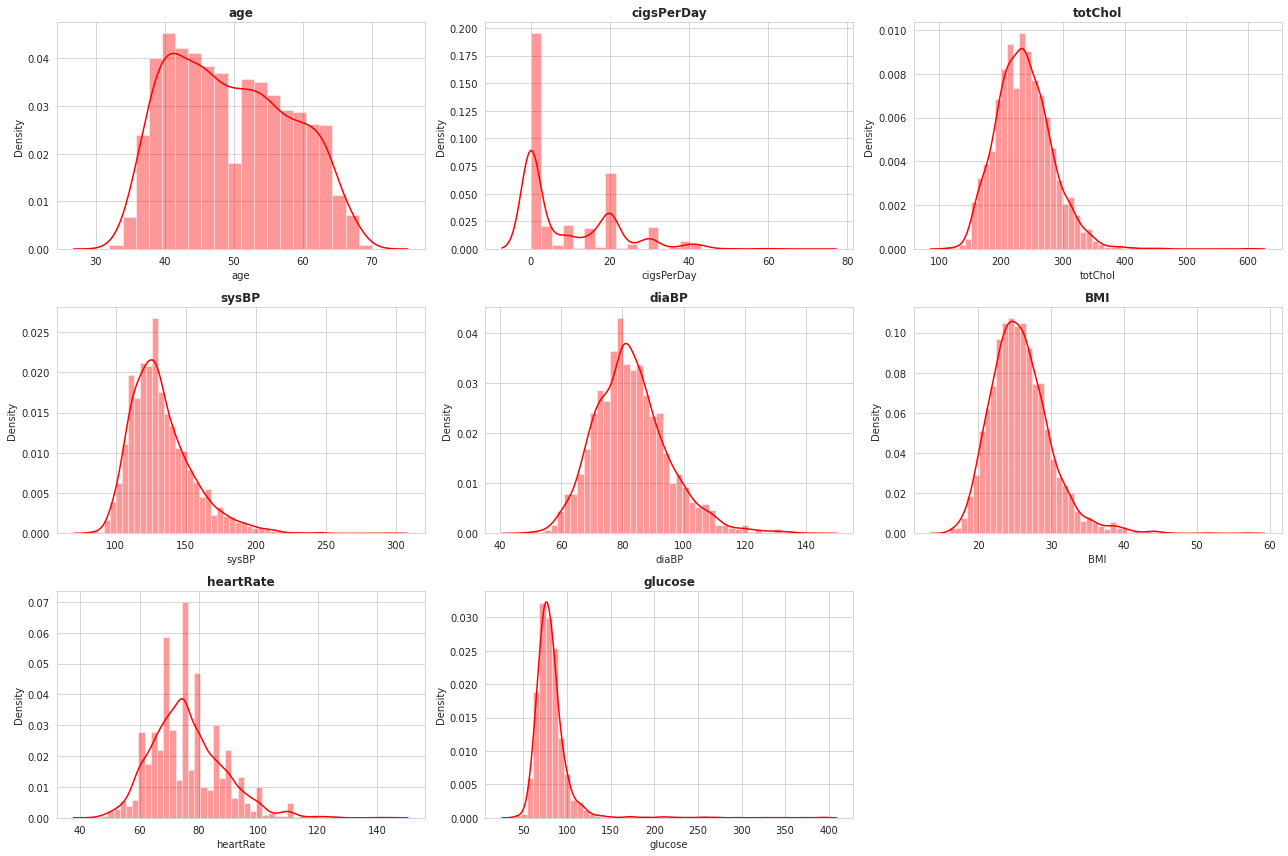

In [ ]:
plt.figure(figsize =(18,12))  #setting the size 

for i,column in enumerate(Numeric_features) :  #Plotting distplot for all the numerical features ...
  plt.subplot(3,3,i+1)  #Subplotting the window for graphs
  sns.distplot(New_df[column], color ='red')
  plt.title(f'{column}', weight='bold')  #setting the title as column name.
  plt.tight_layout()

We can observe that most of the distributions are **right skewed** for numeric features. **totChol (total cholesterol) and BMI** have roughly similar distributions.**Glucose**have a highly right skewed distribution. It shows Glucose has a lot of outliers. Though it is usually a good practice to deal with such outliers, however in this case we can't do much about it as the data is taken through medical survey and the values are patient's health stats, hence those values are absolute and we should not manipulate them. We could have used techniques like Square root transformation, Log tranformation,etc., to convert them to near normal distribution, but since we can't manipulate a medical statistics of a person, it is suggestive to go with the actual values.

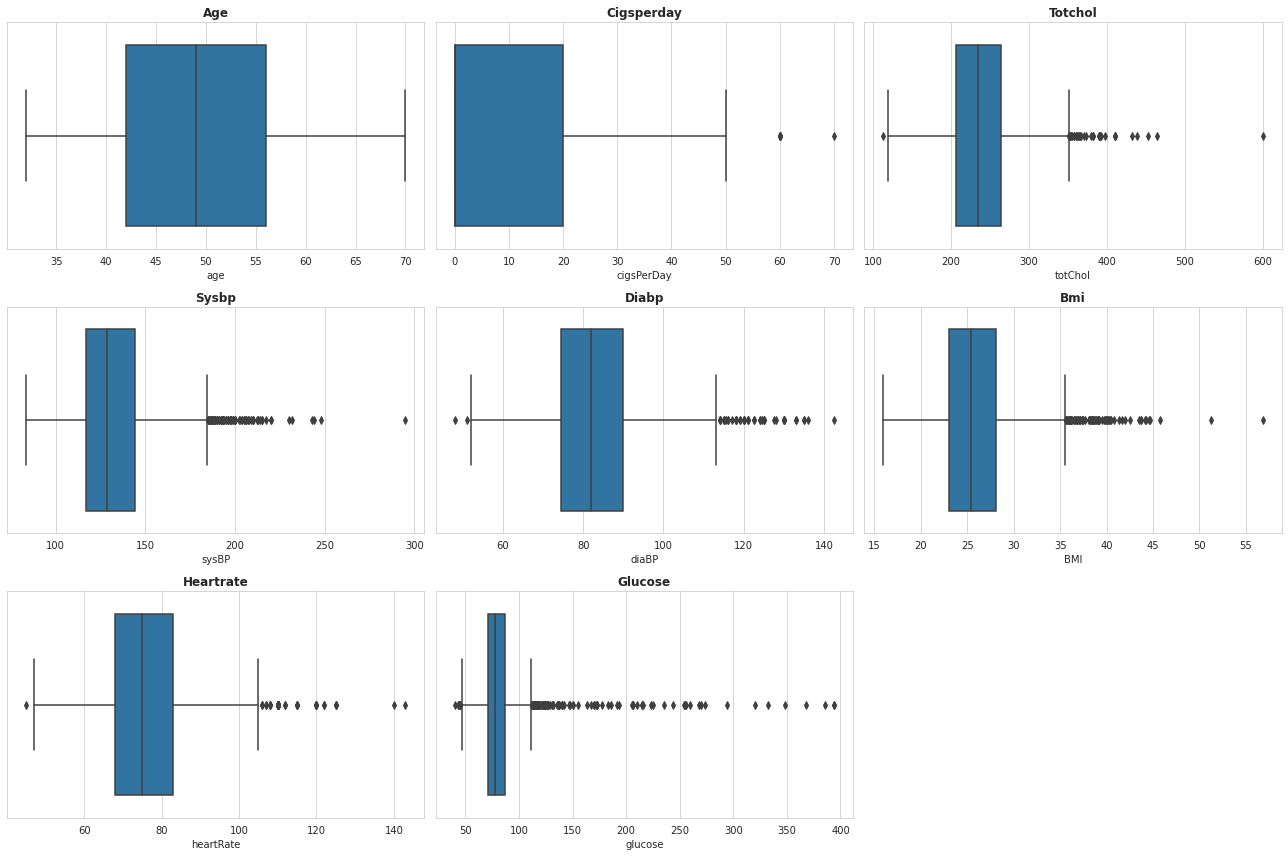

In [ ]:
# Box plot distributions for numeric features.
# Define a figure.
plt.figure(figsize=(18,12))

# plotting subplots for every numeric feature.
for i,column in enumerate(Numeric_features):  # Looping through Numeric_features
  plt.subplot(3, 3, i+1)
  sns.boxplot(New_df[column])   #Plotting BoxPlot for every numeric column
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

As we can see a lot of outliers in **totchol, sysbp, diabp, BMI , Glucose**. As we discussed we cant manipulate the data.If we drop the rows with this outliers we will lose a huge amount og important data so we cant drop them..We can only try to remove borderline outliers(with minimal data loss) which are unlikely to occure (doesnt make sense). 

In [ ]:
New_df =New_df [New_df["cigsPerDay"] <= 50]  # Dropping rows with Cigarette per day greater than 50.

In [ ]:
New_df= New_df[New_df['diaBP'] <= 140]  # Dropping rows with DiaBp greater than 140

In [ ]:
New_df = New_df[New_df['sysBP'] <= 250]   # Dropping rows with SysBP greater than 250.

In [ ]:
New_df = New_df[New_df["heartRate"] <= 130]   # Dropping rows with heart rate greater than 130.

In [ ]:
New_df = New_df[New_df["glucose"] <= 300]    # Dropping rows with glucose greater than 300.

In [ ]:
New_df = New_df[New_df["totChol"] <= 500]   # Dropping rows with total cholesterol greater than 500.

In [ ]:
New_df  #Observing the daraframe

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


## Univariate Analysis :

The purpose of univariate analysis is to understand the distribution of values for a single variable.

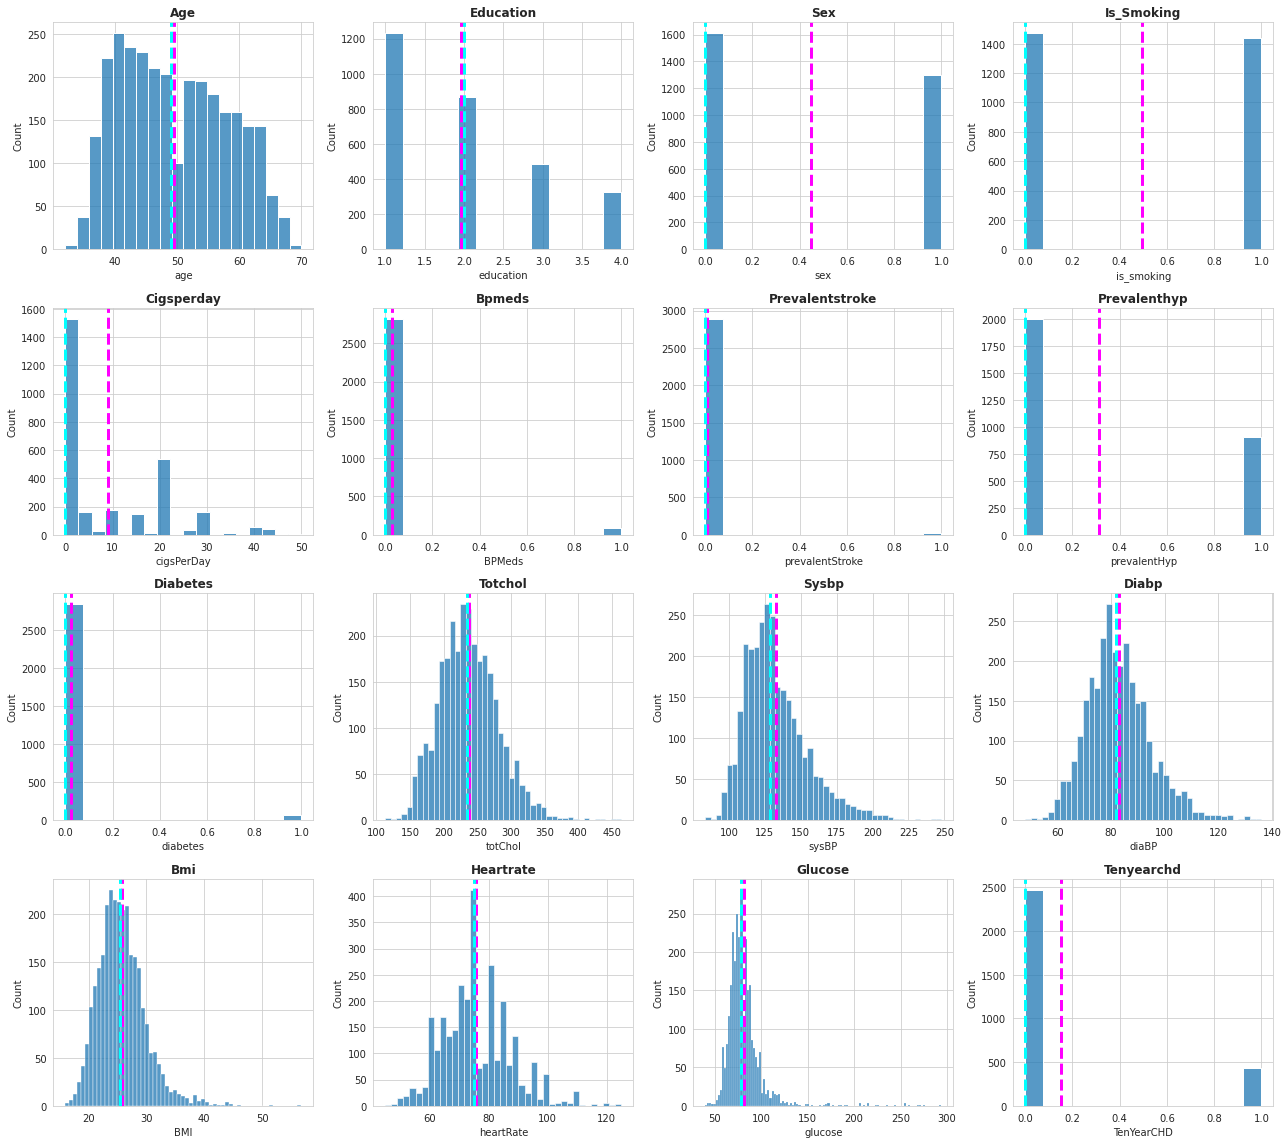

In [ ]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(New_df.columns):
  feature = New_df[column]   #saving all columns in feature variable
  ax=plt.subplot(4, 4, i+1)
  sns.histplot(feature)  #plotting histograms for features 
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=3)  #drawing an axis through mean
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=3)  #drawing an axis through median
  plt.title(f'{column.title()}',weight='bold')   #  Setting the title as column name . 
  plt.tight_layout()

From above histograms we can see how mean and median are positioned in distributions.

## Bivariate Analysis :
Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. 

In our case we'll look for relationships of target variable with all the independent variables.

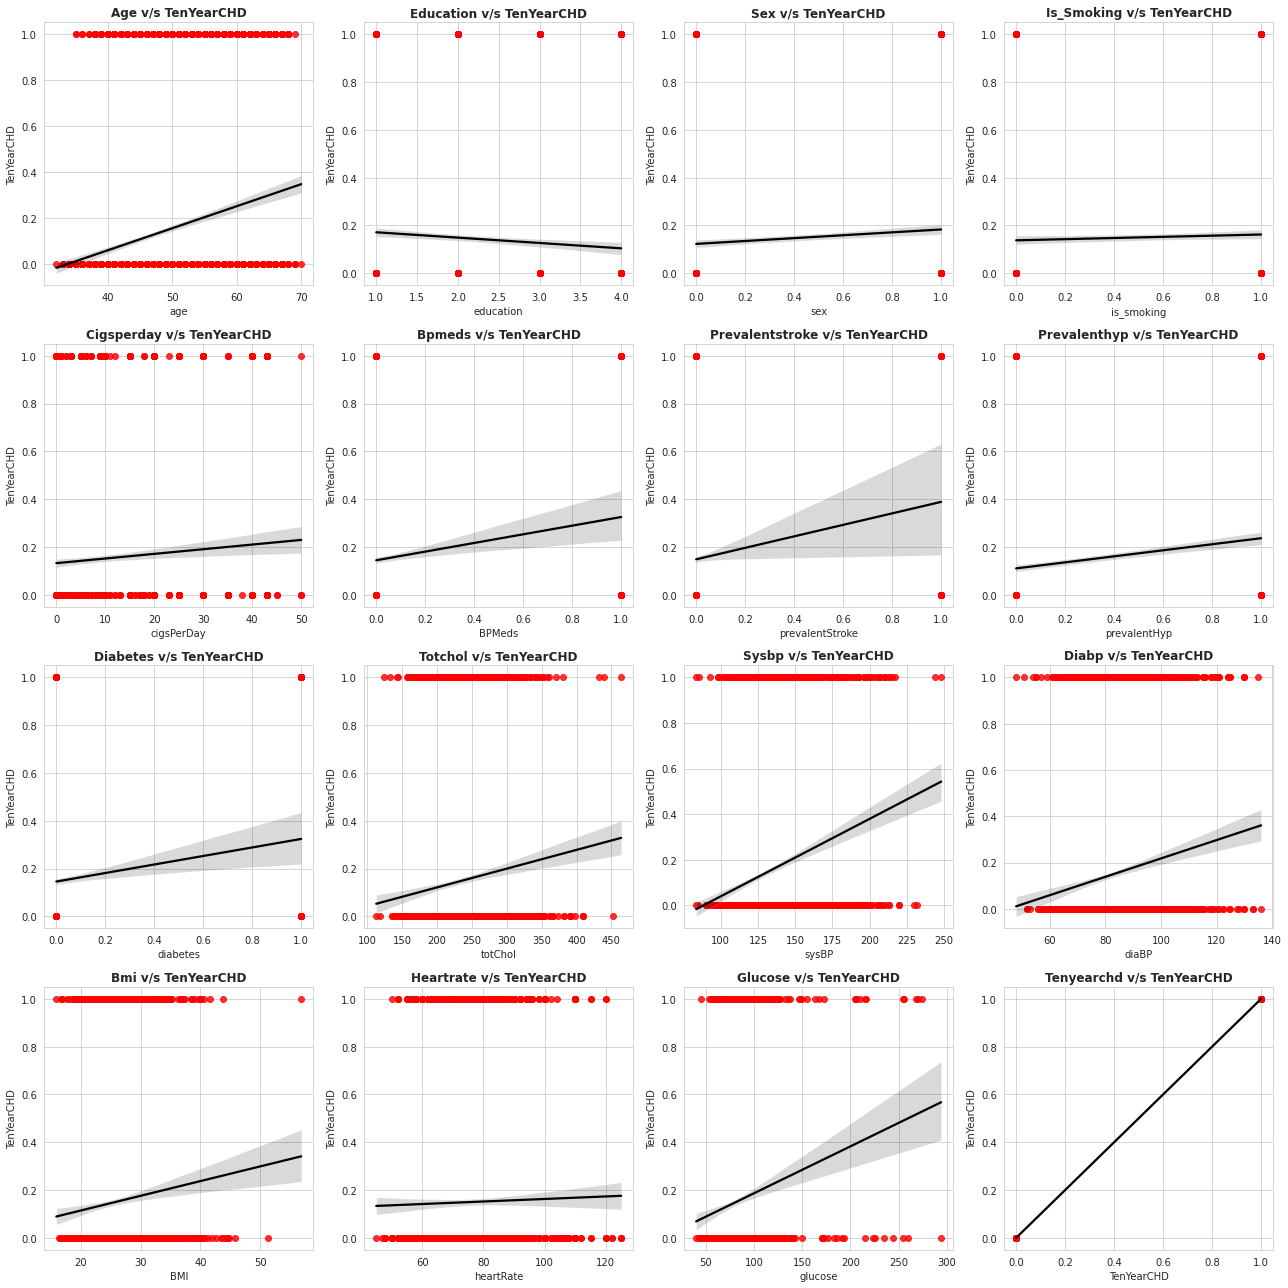

In [ ]:
# Checking Linearity using Bivariate analysis.
# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(New_df.columns ):
  plt.subplot(4, 4, n+1)              #Plottin Subplots
  sns.regplot(x = New_df[column], y =New_df['TenYearCHD'],scatter_kws={"color": 'red'},line_kws={"color": "black"})  #plotting regression plot
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold') # Setting title as column name 
  plt.tight_layout()

As we can see a lot of of Independent variables show relation with our Target variable..

## Checking Multicollinearity :

We'll use a correlation map for understanding correlation between each feature.

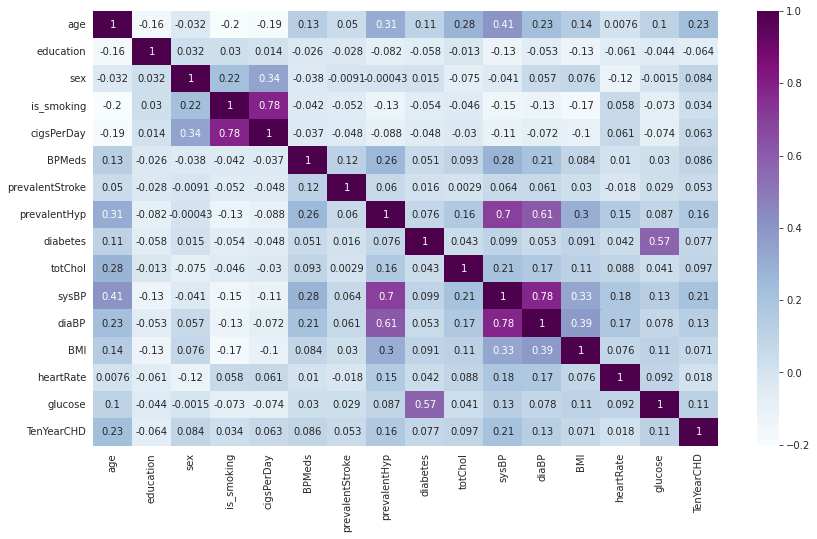

In [ ]:
corr_map = New_df.corr()   # Defining a Seaborn correlation map(Heatmap).
f, ax = plt.subplots(figsize=(14, 8))   # display the heatmap.
sns.heatmap(corr_map,cmap='BuPu', annot=True, ax = ax)

## DiaBp and SysBP :

From the above Heatmap, We can see both of these columns are heavily correleted, there's some relationship we can establish with these two features further.

Also Elevation of systolic blood pressure predicts the risk of cardiovascular disease better than increases in diastolic blood pressure. Although associated with more variability in measurement, systolic blood pressure is easier to determine and allows more appropriate risk stratification than diastolic blood pressure.

We can combine these two features using the following formula:

Mean_Arterial_pressure = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3  .

In [ ]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
New_df['Mean_Arterial_Pressure'] = (New_df['sysBP'] + 2 * New_df['diaBP'])/3

In [ ]:
New_df.drop(columns = ['sysBP', 'diaBP'], inplace = True)   # Dropping the SysBP and DiaBp attributes, since they're both included in Mean_Arterial_Pressure.

As we saw 'is_smoking and 'cigsperday' are correlated with each other and cigs perday give more information as how many cigarettes the person is smoking per day ..so we will remove is_smoking.









In [ ]:
New_df.drop(columns = ['is_smoking'], inplace = True)  # Dropping this columns...

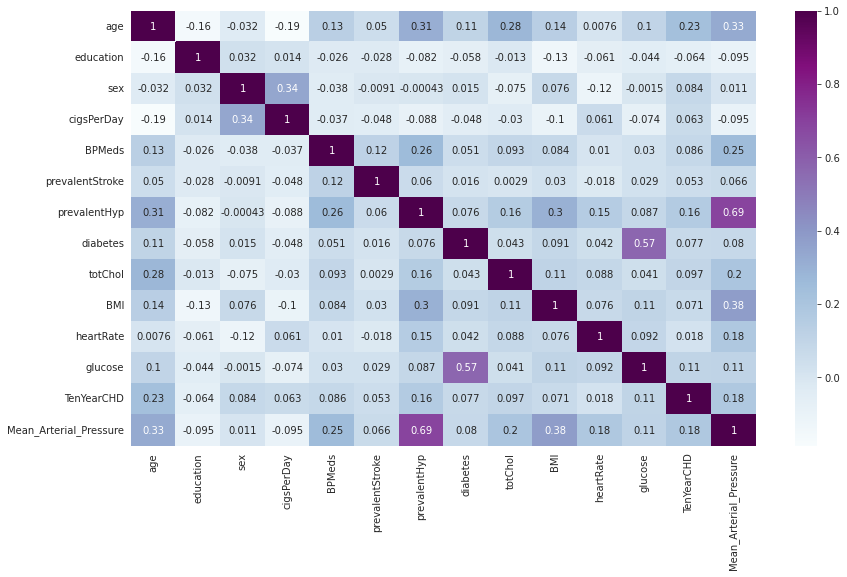

In [ ]:
# Again checking correlation ..
corr_map = New_df.corr()   # Defining a Seaborn correlation map(Heatmap).
f, ax = plt.subplots(figsize=(14, 8))   # display the heatmap.
sns.heatmap(corr_map,cmap='BuPu', annot=True, ax = ax)

In [ ]:
#Final, dataset after feature engineering...
New_df

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,Mean_Arterial_Pressure
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333333
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000000
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333333
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.166667
5,61,3.0,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,141.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0.0,0.0,0,1,0,217.0,26.98,105.0,113.0,0,118.000000
3385,60,1.0,0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,93.833333
3386,46,1.0,0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,71.333333
3387,44,3.0,1,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,1,134.000000


# **Model Building :**

Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets and observe how the models are performing..

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

# Train_test_split :

In [ ]:
# Splitting the data into set of independent variables and a dependent variable.
X = New_df.drop('TenYearCHD',axis=1)  #Independent Variables
y = New_df['TenYearCHD']    #Dependent Variables

In [ ]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y) #we are splitting the data 80% for training and remaining 20% for testing..

In [ ]:
# Training data along with possible number of results for each class.
pd.DataFrame(y_train).value_counts()

TenYearCHD
0             1977
1              349
dtype: int64

In [ ]:
# Training data alomg with possible number of results for each class.
pd.DataFrame(y_test).value_counts()

TenYearCHD
0             495
1              87
dtype: int64

This is what stratify helps us in doing it divides both classes in in right proportion for both test and train data..But even so We can clearly see, the class are imbalanced and it'd result the model to be more biased towards '0' class (people with no Risk of CHD). We need to find a way to train a model in such a way that it can take some risks and give more of '1' class results.

The reason behind that is we have a make a model that can predict a risk of CHD. If, based on patient's health stats, there's even small chance that a person could have a risk of heart disease, the model should be able to predict the risk.

Surely this would lead our model to attain a lower accuracy value since its taking more risks for 'at risk' patients, but in a real world scenario this model is more useful because its highly likely for such model to be able to predict if a patient is at risk.

If we would have used a normal approach here, it might give us a better accuracy thanks to the class imbalancy(**The Metric Trap**), but in real world such model isn't a ideal solution, its expected that it'd mostly fail to predict if the patient isat risk, which takes away the sole purpose of the project.

Hence, to deal with this imbalancies we are using **SMOTETomek** on the training set. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique, or SMOTE** for short. The approach is effective because new synthetic examples from the minority class are created that are plausible And after creating the samples in minority class. Using tomek links in majority class the nearest datapoint are dropped from majority class.

In [ ]:
# Handling class imbalancies using SMOTE... 
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)  # fitting the SMOTETomek to the data.

In [ ]:
Perform_df=pd.DataFrame()   # Dataframe to contain Model performance analysis reports.

## **Models we will try to build :**
Logistic Regression Classifier

Decision Tree Classifier

Random Forest Classifier

XGB Classifier

K-Nearest Neighbors(KNN Classifier)

Naive Bayes Classifier

Support Vector Machine(SVM Classifier).

Neural Networks Classification.


## **Logistic Regression :**

Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).

In [ ]:
#Using gridsearch cv to select best parameters for our model 
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)  #creating model object for logistic regression

In [ ]:
# fit the model.
clf.fit(X_smote, y_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_smote)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Getting the predicted classes for training and testing set.
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.
train_accuracy = accuracy_score(train_class_preds, y_smote)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6468335035750766
The accuracy on test data is  0.6134020618556701


In [ ]:
## Confusion Matrix for logistic regression classifier.
confusion_matrix(y_test,test_class_preds)

array([[304, 191],
       [ 34,  53]])

In [ ]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73       495
           1       0.22      0.61      0.32        87

    accuracy                           0.61       582
   macro avg       0.56      0.61      0.53       582
weighted avg       0.80      0.61      0.67       582



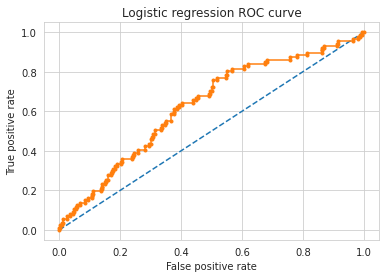

In [ ]:
# Getting the prediction probabilities for test set 
lr_proba = clf.predict_proba(X_test)[:,1]

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_proba)

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')  #plotting Roc Curve 
plt.plot(fpr,tpr, marker='.')
plt.xlabel('False positive rate')  #setting Xlabel,Ylabel and title
plt.ylabel('True positive rate')
plt.title(f"Logistic regression ROC curve")
plt.show()

## **Decision Tree :**
Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In [ ]:
# variable to hold Maximum accuracy value
max_accuracy = 0

# Iterating upto 50 times with random states from 0 to 49
for x in range(50):

  # Creating model object for random forest classifier 
  dt = DecisionTreeClassifier(random_state = x)

  # Fitting the model
  dt.fit(X_smote, y_smote)

  # Predict for testing set
  Y_pred_dt = dt.predict(X_test)

  # Accuracy at a particular random state
  current_accuracy = round(accuracy_score(Y_pred_dt, y_test)*100,2)

  # Compare to get the best accuracy and the respective random state
  if(current_accuracy > max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

# Implementing Decision Tree Classifier model using the best random state we found
dt = DecisionTreeClassifier(random_state = best_x)

# Fitting training data
dt.fit(X_smote, y_smote)

# Predicting for test set
Y_pred_dt = dt.predict(X_test)

In [ ]:
# Accuracy Score for decision tree classifier on test set
score_dt = round(accuracy_score(Y_pred_dt, y_test)*100, 2)
print("The accuracy score for test set achieved using Decision Tree is: " + str(score_dt) + "%")

The accuracy score for test set achieved using Decision Tree is: 73.2%


In [ ]:
## Confusion Matrix for logistic regression classifier.
confusion_matrix(y_test,Y_pred_dt)

array([[404,  91],
       [ 65,  22]])

In [ ]:
print(classification_report(y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       495
           1       0.19      0.25      0.22        87

    accuracy                           0.73       582
   macro avg       0.53      0.53      0.53       582
weighted avg       0.76      0.73      0.75       582



In [ ]:
# storing feature importances in a dataframe
importances = dt.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,education,0.21
0,age,0.18
11,glucose,0.12
12,Mean_Arterial_Pressure,0.11
8,totChol,0.10
10,heartRate,0.10
9,BMI,0.08
3,cigsPerDay,0.06
4,BPMeds,0.03
2,sex,0.01


In [ ]:
features = X_train.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

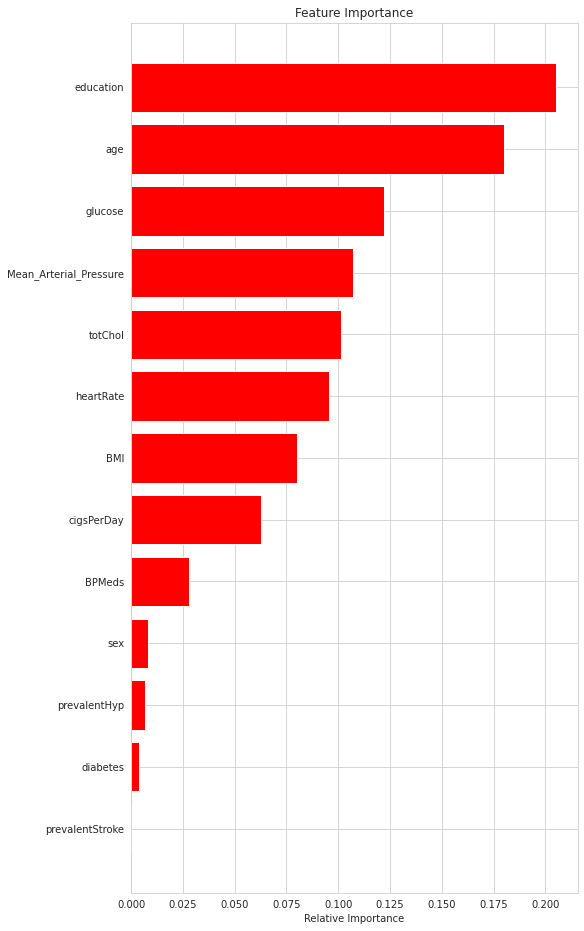

In [ ]:
#Plot the figure
plt.figure(figsize=(8,16))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


## **Random Forest Classifier**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# variable to hold Maximum accuracy value
max_accuracy = 0

# Iterating upto 50 times with random states from 0 to 49
for x in range(50):
  # Creating model object for random forest classifier 
  rf = RandomForestClassifier(random_state=x)

  # Fitting the model
  rf.fit(X_smote,y_smote)

  # Predict for testing set
  Y_pred_rf = rf.predict(X_test)

  # Accuracy at a particular random state
  current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)

  # Compare to get the best accuracy and the respective random state
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

# Implementing Random Forest classifier model using the best random state we found
rf = RandomForestClassifier(random_state=best_x)

# Fitting the model
rf.fit(X_smote,y_smote)

# Predicting on test set
Y_pred_rf = rf.predict(X_test)

In [ ]:
# Accuracy score for the random forest model on test set
score_rf = round(accuracy_score(Y_pred_rf, y_test)*100, 2)
print("The accuracy score for the test set achieved using Random forest is: " + str(score_rf) + " %")

The accuracy score for the test set achieved using Random forest is: 82.65 %


In [ ]:
# Confusion matrix for random forest model
confusion_matrix(y_test,Y_pred_rf)

array([[468,  27],
       [ 74,  13]])

In [ ]:
print(classification_report(y_test, Y_pred_rf))   # Displaying the classification report for random forest

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       495
           1       0.33      0.15      0.20        87

    accuracy                           0.83       582
   macro avg       0.59      0.55      0.55       582
weighted avg       0.78      0.83      0.80       582



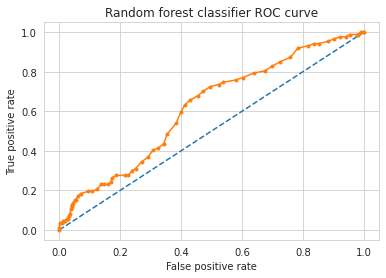

In [ ]:
# Getting the prediction probabilities for test set 
rf_proba = rf.predict_proba(X_test)[:,1]

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_proba)

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')  #plotting Roc Curve 
plt.plot(fpr,tpr, marker='.')
plt.xlabel('False positive rate')  #setting Xlabel,Ylabel and title
plt.ylabel('True positive rate')
plt.title(f"Random forest classifier ROC curve")
plt.show()

In [ ]:
# storing feature importances in a dataframe
importances = rf.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,education,0.17
0,age,0.15
12,Mean_Arterial_Pressure,0.12
8,totChol,0.11
11,glucose,0.11
9,BMI,0.10
10,heartRate,0.10
3,cigsPerDay,0.08
2,sex,0.02
4,BPMeds,0.02


In [ ]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

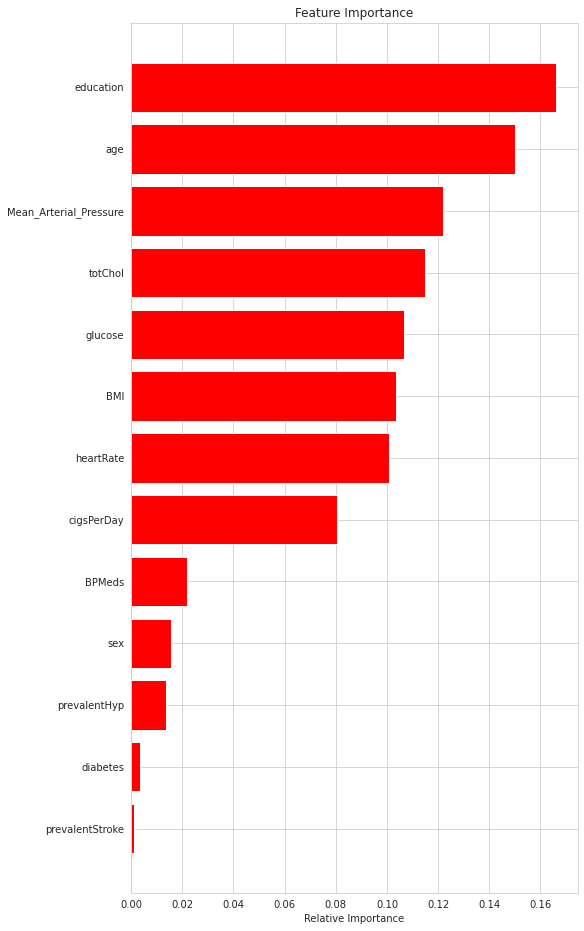

In [ ]:
#Plot the figure
plt.figure(figsize=(8,16))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


## **XGB CLassifier**

The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

The models that form the ensemble, also known as base learners, could be either from the same learning algorithm or different learning algorithms.**Bagging** and **Boosting** are two widely used ensemble learners. Though these two techniques can be used with several statistical models, the most predominant usage has been with decision trees.

In [ ]:
# Implementing the XGBoost classifier model
model =xgb.XGBClassifier()

# Fitting the training set 
model.fit(X_smote, y_smote)

XGBClassifier()

In [ ]:
# Making predictions on training and testing set
y_pred_xgb = model.predict(X_test)
y_train_pred = model.predict(X_smote)

In [ ]:
# Display Accuracy on training and testing set
print(accuracy_score(y_train_pred, y_smote))
print(accuracy_score(y_pred_xgb, y_test))

0.868488253319714
0.7920962199312714


In [ ]:
# Confusion Matrix for XGB Classifier
confusion_matrix(y_test,y_pred_xgb)

array([[441,  54],
       [ 67,  20]])

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       495
           1       0.27      0.23      0.25        87

    accuracy                           0.79       582
   macro avg       0.57      0.56      0.56       582
weighted avg       0.78      0.79      0.79       582



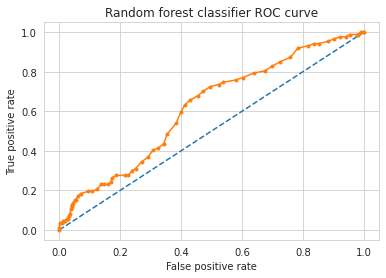

In [ ]:
# Getting the prediction probabilities for test set 
XGB_proba = rf.predict_proba(X_test)[:,1]

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_proba)

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')  #plotting Roc Curve 
plt.plot(fpr,tpr, marker='.')
plt.xlabel('False positive rate')  #setting Xlabel,Ylabel and title
plt.ylabel('True positive rate')
plt.title(f"Random forest classifier ROC curve")
plt.show()

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,education,0.17
0,age,0.15
12,Mean_Arterial_Pressure,0.12
8,totChol,0.11
11,glucose,0.11
9,BMI,0.10
10,heartRate,0.10
3,cigsPerDay,0.08
2,sex,0.02
4,BPMeds,0.02


## **K-Nearest Neighbour (KNN)**

KNN which stands for K-Nearest Neighbours is a simple algorithm that is used for classification and regression problems in Machine Learning. KNN is also non-parametric which means the algorithm does not rely on strong assumptions instead tries to learn any functional form from the training data.

Unlike most of the algorithms with complex names, which are often confusing as to what they really mean, KNN is pretty straight forward. The algorithm considers the k nearest neighbours to predict the class or value of a data point.

The K Nearest Neighbour Algorithm can be performed in 4 simple steps.

Step 1: Identify the problem as either falling to classification or regression.

Step 2: Fix a value for k which can be any number greater than zero.

Step 3: Now find k data points that are closest to the unknown/uncategorized datapoint based on distance(Euclidean Distance, Manhattan Distance etc.)

Step 4: Find the solution in either of the following steps:

In case of classification, we assign the uncategorized datapoint to the class where the maximum number of neighbours belonged to.

In [ ]:
# Number of neighbors.
neighbors = np.arange(1,10)

# Setup arrays to store training and testing accuracies.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Iterate over n-neighbors in order to get the best hyperparemeter value
for i,k in enumerate(neighbors):

    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the KNN model
    knn.fit(X_smote, y_smote)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote, y_smote)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

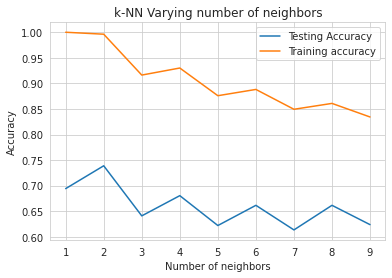

In [ ]:
# Generate plot to represent accuracies for training and testing with regards to KNN model
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 2)

In [ ]:
# Fit the model
knn.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Getting the predictions using the KNN classifier
y_pred_knn = knn.predict(X_test)

In [ ]:
# Confusion matrix for KNN classifier
confusion_matrix(y_test,y_pred_knn)

array([[403,  92],
       [ 60,  27]])

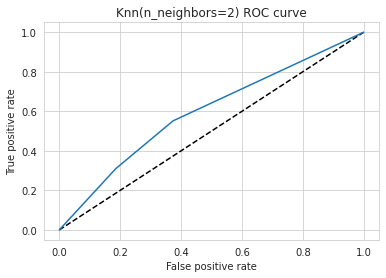

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)

# Plotting the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba_knn)

0.5957157784743992

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
# Using Grid search CV for getting the best set of hyperparameters
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
# Implementing KNN with gridCV model
knn = KNeighborsClassifier()

# Creting gridCV KNN model with 5 cross validations
knn_cv= GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_smote, y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
# Best score for knn model with grid CV
knn_cv.best_score_

0.8840673625772147

In [ ]:
# Best parameter value
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
# Predict for test set
y_pred_knn_cv = knn_cv.predict(X_test)

In [ ]:
# Confusion matrix for KNN classifier
confusion_matrix(y_test,y_pred_knn_cv)

array([[403,  92],
       [ 60,  27]])

## **Naive Bayes Classifier**

The Naïve Bayes algorithm is a classification technique based on the Bayes’ Theorem which assumes there is independence between the features. We interfere with applications utilizing this algorithm on a daily basis, for example it powers recommendation systems for streaming applications or adds on social media as well as many online retail websites.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Let’s have a look under the hood of this major classifier.

The simple form of the calculation for Bayes Theorem is as follows:

**P(A|B) = P(B|A) * P(A) / P(B)**

In [ ]:
# Creating naive bayes model 
gnb = GaussianNB()

# Fitting the model
gnb.fit(X_smote, y_smote)
 
# Making predictions on training and testing set
y_pred_gnb = gnb.predict(X_test)
y_train_pred = gnb.predict(X_smote)

In [ ]:
# Display accuracy scores for training and testing sets
print(accuracy_score(y_train_pred, y_smote))
print(accuracy_score(y_pred_gnb, y_test))

0.591164453524004
0.7852233676975945


In [ ]:
# Confusion matrix for training data in naive bayes classifier
confusion_matrix(y_smote, y_train_pred)

array([[1686,  272],
       [1329,  629]])

In [ ]:
# Confusion matrix for testing data in naive bayes classifier
confusion_matrix(y_test, y_pred_gnb)

array([[424,  71],
       [ 54,  33]])

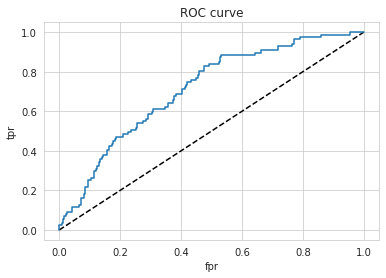

In [ ]:
# Prediction probabilities for naive bayes classifier
y_pred_proba_gnb = gnb.predict_proba(X_test)[:,1]

# Getting the parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gnb)

# Plotting the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba_gnb)

0.7108092418437245

In [ ]:
# Counts of test set 
Counter(y_test)

Counter({0: 495, 1: 87})

In [ ]:
# counts of predicted set
Counter(y_pred_gnb)

Counter({0: 478, 1: 104})

## **Neural Network**

“Neural networks” (more specifically, artificial neural networks) are loosely based on how our human brain works, and the basic unit of a neural network is a neuron.

At the basic level, a neuron does two things:

Receive input from other neurons and combine them together
Perform some kind of transformation to give the neuron’s output
we often take some linear combination of the inputs. In layman terms, if we had three inputs to the neuron (let’s call them x1, x2, and x3), then we would combine them like this:

-- + -- x A1 + -- x A2 + -- x A3

This is a linear combination of inputs to our neurons where the individual blanks are parameters to be optimized for later (i.e. learn from the data what numbers best fill in those blanks). In mathematical terms, the blanks that are attached to the inputs (x1, x2 and x3) are called weights and the blank that is not attached to any input is called the bias.

Note: The neural network is an experimental model that we have implemented, its still in development and we hav'nt figured out the best combination of tuning parameters for our data. The code is ambigious and it doesn't quite perform the same way with every re-run, the accuracy for the model fluctuates a lot and its not fully optimised yet.

In [ ]:
# Developing a Neural network with 2 hidden layers and 1 output layer
def get_model():

    # Creating sequential NN model 
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),

        # using 'tanh' function as the activation function in hidden layers
        keras.layers.Dense(512, activation='tanh'),
        keras.layers.Dense(256, activation='tanh'),

        # keras.layers.Dense(128, activation='relu'),
        # keras.layers.Dense(64, activation='relu'),
        # keras.layers.Dense(32, activation='relu'),
        # keras.layers.Dropout(0.5),

        # using 'sigmoid' function as activation function in output layer
        # this is because we only need to perform a binary classification
        keras.layers.Dense(2, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer = 'Adagrad', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Define a batch size
batch_size = 512

# Creating training and testing datasets using tenserflow
train_ds = tf.data.Dataset.from_tensor_slices((X_smote, y_smote)).shuffle(len(X_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Get model object
model = get_model()

# Fitting training data to the model
fit = model.fit(train_ds, validation_data=val_ds, epochs = 40)

Epoch 1/40
8/8 [==============================] - 1s 36ms/step - loss: 0.7330 - accuracy: 0.5375 - val_loss: 0.7921 - val_accuracy: 0.3935
Epoch 2/40
8/8 [==============================] - 0s 16ms/step - loss: 0.6837 - accuracy: 0.5761 - val_loss: 0.7563 - val_accuracy: 0.4519
Epoch 3/40
8/8 [==============================] - 0s 17ms/step - loss: 0.6754 - accuracy: 0.5766 - val_loss: 0.7220 - val_accuracy: 0.5069
Epoch 4/40
8/8 [==============================] - 0s 17ms/step - loss: 0.6656 - accuracy: 0.5993 - val_loss: 0.7814 - val_accuracy: 0.4141
Epoch 5/40
8/8 [==============================] - 0s 16ms/step - loss: 0.6658 - accuracy: 0.5873 - val_loss: 0.7735 - val_accuracy: 0.4313
Epoch 6/40
8/8 [==============================] - 0s 17ms/step - loss: 0.6614 - accuracy: 0.5922 - val_loss: 0.7552 - val_accuracy: 0.4536
Epoch 7/40
8/8 [==============================] - 0s 16ms/step - loss: 0.6567 - accuracy: 0.5998 - val_loss: 0.8287 - val_accuracy: 0.3660
Epoch 8/40
8/8 [===========

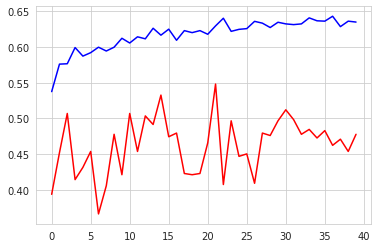

In [ ]:
# Plotting a trend graph for 'accuracy' vs 'val_accuracy'
plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()

In [ ]:
# Predicted values for Neural Network model on test set
y_pred_nn = np.round(model.predict(X_test), 0)

In [ ]:
# Converting the results into numpy array
y_pred_nn = np.array([round(ele[1]) for ele in y_pred_nn])

In [ ]:
# Converting test set values into numpy array
y_test = (np.array(y_test))

In [ ]:
# Lengths of both test and predict values
# Anonymously the length were differentiable on some re-runs, checking just in case! 
print(len(y_pred_nn))
print(len(y_test))

582
582


In [ ]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       495
           1       0.15      1.00      0.26        87

    accuracy                           0.16       582
   macro avg       0.58      0.51      0.15       582
weighted avg       0.87      0.16      0.07       582

